#### Hinweise:
- Cisco VPN muss aktiviert sein
- Verbindung wieder schließen! (letzte Zelle)

#### offene Aufgaben
- andere wichtige Tabellen außer states???

## Imports

In [1]:
import mariadb #DB Handling
import plotly #plotting #1
import pandas as pd #Dataframes
import matplotlib as plt #plotting #2

#keine ahnung wofür das nochmal war, aber ist wichtig ;)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

## initialize connection and cursor

In [2]:
conn = mariadb.connect(
        user="bi2021",
        password="businessintelligence",
        host="212.201.138.114",
        port=3306,
        database="homeassistant" # only interesting database
    )

cur = conn.cursor()

### first connection tests

In [3]:
cur.execute("SHOW DATABASES;")

for i in cur:
    print (i)

('homeassistant',)
('information_schema',)
('mysql',)
('performance_schema',)
('test',)


In [4]:
cur.execute("show tables from homeassistant")
tables = cur

for i in tables:
    print("table:", i[0])
    #sql = "show columns from %s"
    #cur.execute(sql, [i[0],])

table: events
table: recorder_runs
table: schema_changes
table: states
table: statistics
table: statistics_meta
table: statistics_runs


In [5]:
cur.execute("show columns from states")

cols = []

for i in cur:
    cols.append(i[0])

cols # all columns in states

['state_id',
 'domain',
 'entity_id',
 'state',
 'attributes',
 'event_id',
 'last_changed',
 'last_updated',
 'created',
 'old_state_id']

In [6]:
#cur.execute("SELECT * FROM states LIMIT 1000 WHERE entity_id=(?)", ("sensor.sensor_2_uptime",))
#for i in cur:
   # print (i)

# PROBLEM: Wie geht Parametrisierung bei MariaDB????
# Interagieren mit Dashboard so unmöglich wenn neue Daten geladen werden müssen.

## Intialize Pandas Dataframe with all data from states

In [7]:
cur.execute("SELECT * FROM states")
df = pd.DataFrame(data=cur.fetchall(), columns=cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514844 entries, 0 to 514843
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   state_id      514844 non-null  int64         
 1   domain        514844 non-null  object        
 2   entity_id     514844 non-null  object        
 3   state         514843 non-null  object        
 4   attributes    514844 non-null  object        
 5   event_id      514844 non-null  int64         
 6   last_changed  514844 non-null  datetime64[ns]
 7   last_updated  514844 non-null  datetime64[ns]
 8   created       514844 non-null  datetime64[ns]
 9   old_state_id  514564 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 39.3+ MB


### def drop all non relevant rows (from entity_id, see sensoren.xlsx)

Hier erste Funktion deklariert, so einfacher auszulagern

In [8]:
def drop_non_relevant(df):
    print("dropped", len(df[df["entity_id"]=="person.fschmidmichels"]), "from 'person.fschmidmichels'")
    df = df.drop(df[df["entity_id"]=="person.fschmidmichels"].index, 0)
    print("dropped", len(df[df["entity_id"]=="weather.langer_weg"]), "from 'weather.langer_weg'")
    df = df.drop(df[df["entity_id"]=="weather.langer_weg"].index, 0)
    print("dropped", len(df[df["entity_id"]=="zone.home"]), "from 'zone.home'")
    df = df.drop(df[df["entity_id"]=="zone.home"].index, 0)
    print("dropped", len(df[df["entity_id"]=="print_entities_to_file"]), "from 'print_entities_to_file'")
    df = df.drop(df[df["entity_id"]=="script.print_entities_to_file"].index, 0)
    print("dropped", len(df[df["entity_id"]=="wlan_switch_energy_totalstarttime"]), "from 'wlan_switch_energy_totalstarttime'")
    df = df.drop(df[df["entity_id"]=="sensor.wlan_switch_energy_totalstarttime"].index, 0)
    print("dropped", len(df[df["entity_id"]=="wlan_switch_status"]), "from 'wlan_switch_status'")
    df = df.drop(df[df["entity_id"]=="sensor.wlan_switch_status"].index, 0)
    print("dropped", len(df[df["entity_id"]=="switch.smartplug3_230v"]), "from 'switch.smartplug3_230v'")
    df = df.drop(df[df["entity_id"]=="switch.smartplug3_230v"].index, 0)
    print("dropped", len(df[df["entity_id"]=="sensor.smartplug3_energy_totalstarttime"]), "from 'sensor.smartplug3_energy_totalstarttime'")
    df = df.drop(df[df["entity_id"]=="sensor.smartplug3_energy_totalstarttime"].index, 0)
    print("dropped", len(df[df["entity_id"]=="sensor.smartplug3_status"]), "from 'sensor.smartplug3_status'")
    df = df.drop(df[df["entity_id"]=="sensor.smartplug3_status"].index, 0)
    print("dropped", len(df[df["entity_id"]=="switch.smartplug3_usb"]), "from 'switch.smartplug3_usb'")
    df = df.drop(df[df["entity_id"]=="switch.smartplug3_usb"].index, 0)
    print("dropped", len(df[df["entity_id"]=="sun.sun"]), "from 'sun.sun'")
    df = df.drop(df[df["entity_id"]=="sun.sun"].index, 0)
    print("dropped", len(df[df["entity_id"]=="binary_sensor.updater"]), "from 'binary_sensor.updater'")
    df = df.drop(df[df["entity_id"]=="binary_sensor.updater"].index, 0)

    
    ######from here on in excel unmentioned entityids######

    print("dropped", len(df[df["entity_id"]=="binary_sensor.wlan_switch_button1"]), "from 'binary_sensor.wlan_switch_button1'")
    df = df.drop(df[df["entity_id"]=="binary_sensor.wlan_switch_button1"].index, 0)
    print("dropped", len(df[df["entity_id"]=="persistent_notification.config_entry_discovery"]), "from 'persistent_notification.config_entry_discovery'")
    df = df.drop(df[df["entity_id"]=="persistent_notification.config_entry_discovery"].index, 0)
    print("dropped", len(df[df["entity_id"]=="sensor.mh_z19_temperature"]), "from 'sensor.mh_z19_temperature'")
    df = df.drop(df[df["entity_id"]=="sensor.mh_z19_temperature"].index, 0)
    print("dropped", len(df[df["entity_id"]=="switch.wlan_switch"]), "from 'switch.wlan_switch'")
    df = df.drop(df[df["entity_id"]=="switch.wlan_switch"].index, 0)

    return df

df = drop_non_relevant(df)
df

dropped 6 from 'person.fschmidmichels'
dropped 745 from 'weather.langer_weg'
dropped 3 from 'zone.home'
dropped 0 from 'print_entities_to_file'
dropped 0 from 'wlan_switch_energy_totalstarttime'
dropped 0 from 'wlan_switch_status'
dropped 12 from 'switch.smartplug3_230v'
dropped 9024 from 'sensor.smartplug3_energy_totalstarttime'
dropped 10894 from 'sensor.smartplug3_status'
dropped 14 from 'switch.smartplug3_usb'
dropped 7858 from 'sun.sun'
dropped 9 from 'binary_sensor.updater'
dropped 5 from 'binary_sensor.wlan_switch_button1'
dropped 2 from 'persistent_notification.config_entry_discovery'
dropped 1380 from 'sensor.mh_z19_temperature'
dropped 7 from 'switch.wlan_switch'


,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
0,5171659,sensor,sensor.sensor_2_uptime,1537677,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387777,2021-11-09 04:12:04.841447,2021-11-09 04:12:04.841447,2021-11-09 04:12:04.841447,NaN
1,5171660,sensor,sensor.mh_z19_co2_value,401,"{""state_class"":""measurement"",""unit_of_measurem...",5387778,2021-11-09 04:12:31.686499,2021-11-09 04:12:31.686499,2021-11-09 04:12:31.686499,NaN
2,5171661,sensor,sensor.sensor_3_uptime,1537726,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387779,2021-11-09 04:12:35.829168,2021-11-09 04:12:35.829168,2021-11-09 04:12:35.829168,NaN
3,5171662,sensor,sensor.sensor_1_wifi_signal,-43,"{""unit_of_measurement"":""dB"",""friendly_name"":""S...",5387780,2021-11-09 04:12:41.468936,2021-11-09 04:12:41.468936,2021-11-09 04:12:41.468936,NaN
4,5171663,sensor,sensor.sensor_1_uptime,1537733,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5387781,2021-11-09 04:12:44.380609,2021-11-09 04:12:44.380609,2021-11-09 04:12:44.380609,NaN
...,...,...,...,...,...,...,...,...,...,...
514839,5686498,sensor,sensor.smartplug3_energy_factor,0.15,"{""unit_of_measurement"":""Cos \u03c6"",""friendly_...",5945875,2021-12-10 08:40:22.511957,2021-12-10 08:40:22.511957,2021-12-10 08:40:22.511957,5686436.0
514840,5686499,sensor,sensor.smartplug3_energy_voltage,233,"{""unit_of_measurement"":""V"",""friendly_name"":""Sm...",5945876,2021-12-10 08:40:22.512535,2021-12-10 08:40:22.512535,2021-12-10 08:40:22.512535,5686437.0
514841,5686500,sensor,sensor.smartplug3_energy_current,0.051,"{""unit_of_measurement"":""A"",""friendly_name"":""Sm...",5945877,2021-12-10 08:40:22.513017,2021-12-10 08:40:22.513017,2021-12-10 08:40:22.513017,5686438.0
514842,5686501,sensor,sensor.sensor_1_uptime,2073224,"{""unit_of_measurement"":""s"",""friendly_name"":""Se...",5945878,2021-12-10 08:40:32.209986,2021-12-10 08:40:32.209986,2021-12-10 08:40:32.209986,5686484.0


### Einteilung der entity Ids in eigene dataframes

jede entity id wird getrennt

abspeichern aller dataframes in dictionary (**möglicherweise nochmal überdenken**)

key: entity id name

value: dataframe only with entity id = key

In [9]:
df_dict = {}
for i in df["entity_id"].unique():
    print(i)
    print("...", df[df["entity_id"]==str(i)])
    df_dict.update({i:df[df["entity_id"]==str(i)]})

df_dict

sensor.sensor_2_uptime
...         state_id  domain               entity_id    state  \
0        5171659  sensor  sensor.sensor_2_uptime  1537677   
7        5171666  sensor  sensor.sensor_2_uptime  1537737   
14       5171673  sensor  sensor.sensor_2_uptime  1537797   
21       5171680  sensor  sensor.sensor_2_uptime  1537857   
30       5171689  sensor  sensor.sensor_2_uptime  1537917   
...          ...     ...                     ...      ...   
514787   5686446  sensor  sensor.sensor_2_uptime  2072930   
514797   5686456  sensor  sensor.sensor_2_uptime  2072990   
514816   5686475  sensor  sensor.sensor_2_uptime  2073050   
514823   5686482  sensor  sensor.sensor_2_uptime  2073110   
514828   5686487  sensor  sensor.sensor_2_uptime  2073171   

                                               attributes  event_id  \
0       {"unit_of_measurement":"s","friendly_name":"Se...   5387777   
7       {"unit_of_measurement":"s","friendly_name":"Se...   5387784   
14      {"unit_of_measureme

{'sensor.sensor_2_uptime':         state_id  domain               entity_id    state  \
 0        5171659  sensor  sensor.sensor_2_uptime  1537677   
 7        5171666  sensor  sensor.sensor_2_uptime  1537737   
 14       5171673  sensor  sensor.sensor_2_uptime  1537797   
 21       5171680  sensor  sensor.sensor_2_uptime  1537857   
 30       5171689  sensor  sensor.sensor_2_uptime  1537917   
 ...          ...     ...                     ...      ...   
 514787   5686446  sensor  sensor.sensor_2_uptime  2072930   
 514797   5686456  sensor  sensor.sensor_2_uptime  2072990   
 514816   5686475  sensor  sensor.sensor_2_uptime  2073050   
 514823   5686482  sensor  sensor.sensor_2_uptime  2073110   
 514828   5686487  sensor  sensor.sensor_2_uptime  2073171   
 
                                                attributes  event_id  \
 0       {"unit_of_measurement":"s","friendly_name":"Se...   5387777   
 7       {"unit_of_measurement":"s","friendly_name":"Se...   5387784   
 14      {"u

In [10]:
for i in df_dict:
    df_dict[i]

In [11]:
#for i in df.columns:
   # print(df[str(i)].unique())

In [12]:
df["entity_id"].value_counts()

sensor.sensor_2_uptime                           44922
sensor.sensor_3_uptime                           44921
sensor.sensor_1_uptime                           44919
sensor.mh_z19_co2_value                          34914
sensor.sensor_2_wifi_signal                      24688
sensor.sensor_3_wifi_signal                      23129
sensor.bh1750_illuminance_2                      17497
sensor.sensor_1_wifi_signal                      17479
sensor.dht22_temperature                         13722
sensor.ccs811_eco2_value                         13322
sensor.bme280_pressure                           13170
sensor.ccs811_total_volatile_organic_compound     9323
sensor.smartplug3_energy_total                    9024
sensor.smartplug3_energy_yesterday                9024
sensor.smartplug3_energy_today                    9023
sensor.smartplug3_energy_power                    9022
sensor.smartplug3_energy_apparentpower            9022
sensor.smartplug3_energy_reactivepower            9021
sensor.sma

In [13]:
for i in df["domain"].unique():
    print(i)

sensor
binary_sensor


### Alternative

In [14]:
df_sensor = df[df["domain"]=="sensor"]

In [15]:
df_sun = df[df["domain"]=="sun"]
df_weather = df[df["domain"]=="weather"]
df_binary_sensor = df[df["domain"]=="binary_sensor"]
df_persistent_notification = df[df["domain"]=="persistent_notification"]
df_switch = df[df["domain"]=="switch"]
df_person = df[df["domain"]=="person"]
df_zone = df[df["domain"]=="zone"]
df_script = df[df["domain"]=="script"]

In [16]:
df_sensor["entity_id"].unique()

array(['sensor.sensor_2_uptime', 'sensor.mh_z19_co2_value',
       'sensor.sensor_3_uptime', 'sensor.sensor_1_wifi_signal',
       'sensor.sensor_1_uptime', 'sensor.sensor_3_wifi_signal',
       'sensor.sensor_2_wifi_signal', 'sensor.bme280_temperature',
       'sensor.dht22_temperature', 'sensor.dht22_humidity',
       'sensor.bme280_pressure', 'sensor.smartplug3_energy_total',
       'sensor.smartplug3_energy_yesterday',
       'sensor.smartplug3_energy_today', 'sensor.smartplug3_energy_power',
       'sensor.smartplug3_energy_apparentpower',
       'sensor.smartplug3_energy_reactivepower',
       'sensor.smartplug3_energy_voltage',
       'sensor.smartplug3_energy_factor',
       'sensor.smartplug3_energy_current', 'sensor.ccs811_eco2_value',
       'sensor.ccs811_total_volatile_organic_compound',
       'sensor.bme280_humidity', 'sensor.bh1750_illuminance_2',
       'sensor.bh1750_illuminance', 'sensor.sensor_2_firmware_version',
       'sensor.sensor_1_firmware_version',
       's

In [17]:
def convert_and_delete (df_dict):
    list_nonnum = []
    for i in df_dict:
        print("Aktuelle entity_id:", i)
        print(df_dict[i]["state"].head(), "\n")
        print("Anzahl unknown: ", df_dict[i][df_dict[i]["state"]=="unknown"].count())
        print("Anzahl unavailable: ", df_dict[i][df_dict[i]["state"]=="unavailable"].count())
        df_dict[i] = df_dict[i].drop(df_dict[i][df_dict[i]["state"]=="unknown"].index)
        df_dict[i] = df_dict[i].drop(df_dict[i][df_dict[i]["state"]=="unavailable"].index)

        try:             
            df_dict[i]["state"] = pd.to_numeric(df_dict[i]["state"])
            print(i, "Erfolgreich zu numerischen Werten konvertiert")

        except:
            print("Nicht numerisch: ", i)
            list_nonnum.append(str(i))
    #print(list_nonnum)
    for i in list_nonnum:
        try:
            df_dict[i].state.apply(str)
            list_nonnum.remove(i)
        except:
            print("non numeric nor string:", i)

        #print(df_dict[i]["state"].head(), "\n")
    print("Weder numerisch noch String:", list_nonnum)

    return df_dict

df_dict = convert_and_delete(df_dict)

Aktuelle entity_id: sensor.sensor_2_uptime
0     1537677
7     1537737
14    1537797
21    1537857
30    1537917
Name: state, dtype: object 

Anzahl unknown:  state_id        0
domain          0
entity_id       0
state           0
attributes      0
event_id        0
last_changed    0
last_updated    0
created         0
old_state_id    0
dtype: int64
Anzahl unavailable:  state_id        9
domain          9
entity_id       9
state           9
attributes      9
event_id        9
last_changed    9
last_updated    9
created         9
old_state_id    6
dtype: int64
sensor.sensor_2_uptime Erfolgreich zu numerischen Werten konvertiert
Aktuelle entity_id: sensor.mh_z19_co2_value
1     401
8     403
15    404
23    403
34    400
Name: state, dtype: object 

Anzahl unknown:  state_id        0
domain          0
entity_id       0
state           0
attributes      0
event_id        0
last_changed    0
last_updated    0
created         0
old_state_id    0
dtype: int64
Anzahl unavailable:  state_id   

In [37]:
for i in df_sensor["entity_id"].unique():
    print(i)
    #try:
    df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"].plot()
    #except:
       # print("somethings wrong")

sensor.sensor_2_uptime
sensor.mh_z19_co2_value
sensor.sensor_3_uptime
sensor.sensor_1_wifi_signal
sensor.sensor_1_uptime
sensor.sensor_3_wifi_signal
sensor.sensor_2_wifi_signal
sensor.bme280_temperature
sensor.dht22_temperature
sensor.dht22_humidity
sensor.bme280_pressure
sensor.smartplug3_energy_total
sensor.smartplug3_energy_yesterday
sensor.smartplug3_energy_today
sensor.smartplug3_energy_power
sensor.smartplug3_energy_apparentpower
sensor.smartplug3_energy_reactivepower
sensor.smartplug3_energy_voltage
sensor.smartplug3_energy_factor
sensor.smartplug3_energy_current
sensor.ccs811_eco2_value
sensor.ccs811_total_volatile_organic_compound


C:\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


sensor.bme280_humidity
sensor.bh1750_illuminance_2
sensor.bh1750_illuminance
sensor.sensor_2_firmware_version
sensor.sensor_1_firmware_version
sensor.sensor_3_firmware_version
sensor.wlan_switch_energy_total
sensor.wlan_switch_energy_yesterday
sensor.wlan_switch_energy_today
sensor.wlan_switch_energy_power
sensor.wlan_switch_energy_apparentpower
sensor.wlan_switch_energy_reactivepower
sensor.wlan_switch_energy_factor
sensor.wlan_switch_energy_voltage
sensor.wlan_switch_energy_current


ValueError: Date ordinal 6110714.491231663 converts to 18700-07-27T11:47:22.415680 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

In [ ]:
df_sensor = df_sensor.drop(df_sensor[df_sensor["state"]=="unavailable"].index)
df_sensor = df_sensor.drop(df_sensor[df_sensor["state"]=="unknown"].index)

In [ ]:
df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"] = pd.to_numeric(df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"], errors="coerce")

<ipython-input-20-85ac5185b59b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"] = pd.to_numeric(df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]["state"], errors="coerce")


In [ ]:
df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"].plot(x="created", y="state")

TypeError: no numeric data to plot

In [ ]:
df_sensor["state"] = pd.to_numeric(df_sensor["state"])

ValueError: Unable to parse string "2019-11-15T15:30:22" at position 37

In [ ]:
df_sensor[df_sensor["state"]=="2019-11-15T15:30:22"]

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,old_state_id
37,5171696,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387814,2021-11-09 04:16:45.984035,2021-11-09 04:16:45.984035,2021-11-09 04:16:45.984035,NaN
77,5171736,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387854,2021-11-09 04:21:45.989234,2021-11-09 04:21:45.989234,2021-11-09 04:21:45.989234,5171696.0
120,5171779,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387897,2021-11-09 04:26:46.021874,2021-11-09 04:26:46.021874,2021-11-09 04:26:46.021874,5171736.0
165,5171824,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387942,2021-11-09 04:31:45.999269,2021-11-09 04:31:45.999269,2021-11-09 04:31:45.999269,5171779.0
212,5171871,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5387989,2021-11-09 04:36:46.020560,2021-11-09 04:36:46.020560,2021-11-09 04:36:46.020560,5171824.0
...,...,...,...,...,...,...,...,...,...,...
276002,5447661,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682219,2021-11-26 09:00:15.832844,2021-11-26 09:00:15.832844,2021-11-26 09:00:15.832844,5447601.0
276070,5447729,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682293,2021-11-26 09:05:15.808313,2021-11-26 09:05:15.808313,2021-11-26 09:05:15.808313,5447661.0
276132,5447791,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682361,2021-11-26 09:10:15.799350,2021-11-26 09:10:15.799350,2021-11-26 09:10:15.799350,5447729.0
276202,5447861,sensor,sensor.smartplug3_energy_totalstarttime,2019-11-15T15:30:22,"{""unit_of_measurement"":"" "",""friendly_name"":""Sm...",5682437,2021-11-26 09:15:15.813144,2021-11-26 09:15:15.813144,2021-11-26 09:15:15.813144,5447791.0


In [ ]:
df_sensor_illuminance = df_sensor[df_sensor["entity_id"]=="sensor.bh1750_illuminance"]
df_sensor_illuminance2 = df_sensor[df_sensor["entity_id"]=="sensor.bh1750_illuminance_2"]
df_sensor_mh_z19_co2_value = df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_co2_value"]
df_sensor_bme280_temperature = df_sensor[df_sensor["entity_id"]=="sensor.bme280_temperature"]
df_sensor_dht22_temperature = df_sensor[df_sensor["entity_id"]=="sensor.dht22_temperature"]
df_sensor_dht22_humidity = df_sensor[df_sensor["entity_id"]=="sensor.dht22_humidity"]
df_sensor_bme280_pressure = df_sensor[df_sensor["entity_id"]=="sensor.bme280_pressure"]
df_sensor_ccs811_eco2_value = df_sensor[df_sensor["entity_id"]=="sensor.ccs811_eco2_value"]
df_sensor_ccs811_total_volatile_organic_compound = df_sensor[df_sensor["entity_id"]=="sensor.ccs811_total_volatile_organic_compound"]
df_sensor_bme280_humidity = df_sensor[df_sensor["entity_id"]=="sensor.bme280_humidity"]
df_sensor_mh_z19_temperature = df_sensor[df_sensor["entity_id"]=="sensor.mh_z19_temperature"]

In [ ]:
df_sensor_illuminance["state"] = pd.to_numeric(df_sensor_illuminance["state"])
df_sensor_illuminance2["state"] = pd.to_numeric(df_sensor_illuminance2["state"])
df_sensor_mh_z19_co2_value["state"] = pd.to_numeric(df_sensor_mh_z19_co2_value["state"])
df_sensor_bme280_temperature["state"] = pd.to_numeric(df_sensor_bme280_temperature["state"])
df_sensor_dht22_temperature["state"] = pd.to_numeric(df_sensor_dht22_temperature["state"])
df_sensor_dht22_humidity["state"] = pd.to_numeric(df_sensor_dht22_humidity["state"])
df_sensor_bme280_pressure["state"] = pd.to_numeric(df_sensor_bme280_pressure["state"])
df_sensor_ccs811_eco2_value["state"] = pd.to_numeric(df_sensor_ccs811_eco2_value["state"])
df_sensor_ccs811_total_volatile_organic_compound["state"] = pd.to_numeric(df_sensor_ccs811_total_volatile_organic_compound["state"])
df_sensor_bme280_humidity["state"] = pd.to_numeric(df_sensor_bme280_humidity["state"])
df_sensor_mh_z19_temperature["state"] = pd.to_numeric(df_sensor_mh_z19_temperature["state"])

<ipython-input-25-8822a9fe80b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor_illuminance["state"] = pd.to_numeric(df_sensor_illuminance["state"])
<ipython-input-25-8822a9fe80b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor_illuminance2["state"] = pd.to_numeric(df_sensor_illuminance2["state"])
<ipython-input-25-8822a9fe80b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

sensor.sensor_2_uptime
sensor.mh_z19_co2_value
sensor.sensor_3_uptime
sensor.sensor_1_wifi_signal
sensor.sensor_1_uptime
sensor.sensor_3_wifi_signal
sensor.sensor_2_wifi_signal
sensor.bme280_temperature
sensor.dht22_temperature
sensor.dht22_humidity
sensor.bme280_pressure
sensor.smartplug3_energy_total
sensor.smartplug3_energy_yesterday
sensor.smartplug3_energy_today
sensor.smartplug3_energy_power
sensor.smartplug3_energy_apparentpower
sensor.smartplug3_energy_reactivepower
sensor.smartplug3_energy_voltage
sensor.smartplug3_energy_factor
sensor.smartplug3_energy_current
sensor.ccs811_eco2_value
sensor.ccs811_total_volatile_organic_compound
sensor.bme280_humidity
sensor.bh1750_illuminance_2


C:\Python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


sensor.bh1750_illuminance
binary_sensor.sensor_2_sensor_status


TypeError: no numeric data to plot

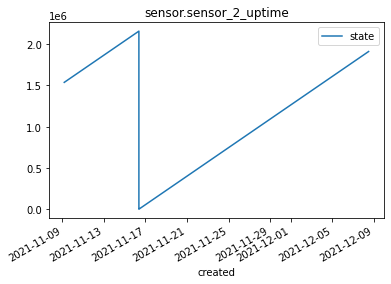

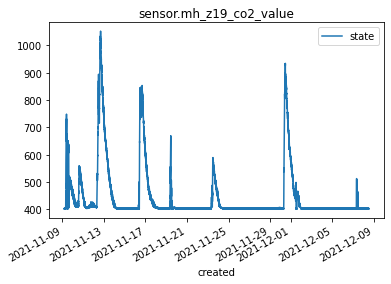

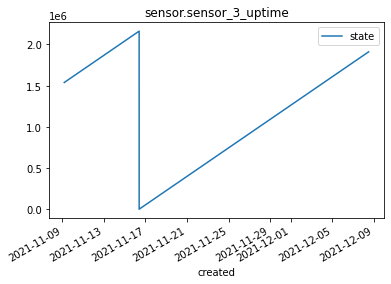

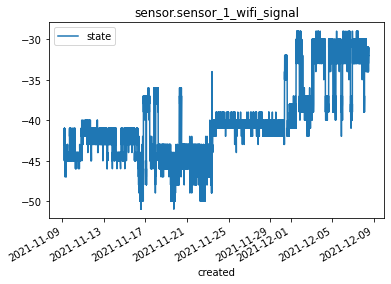

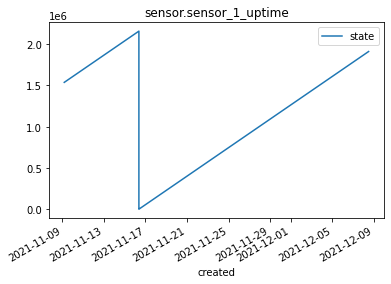

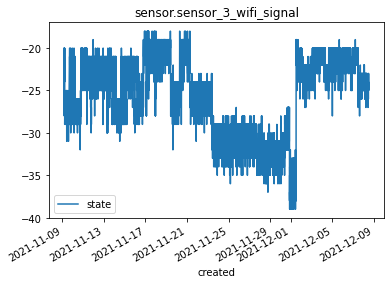

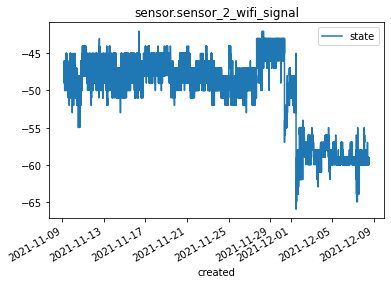

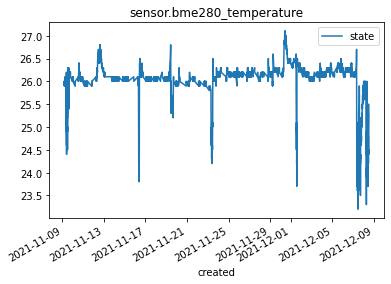

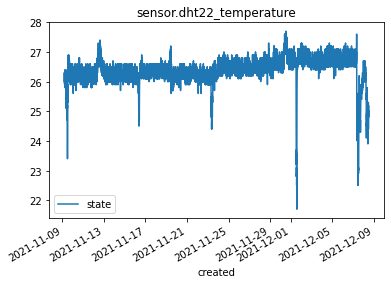

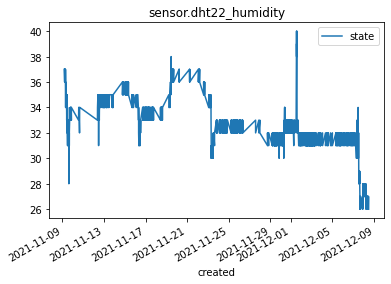

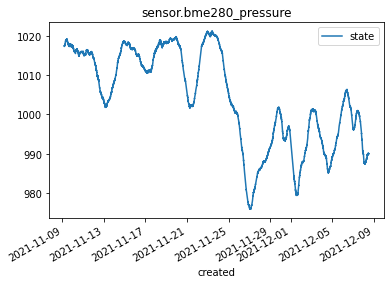

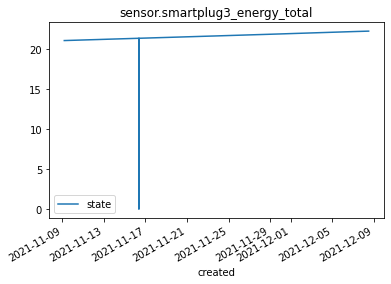

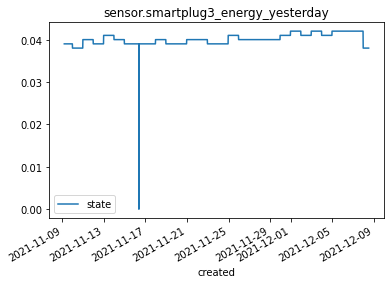

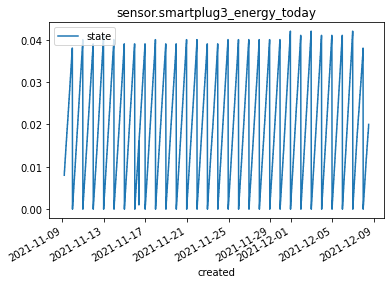

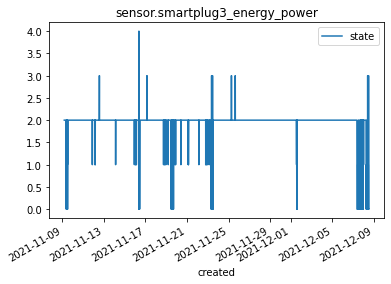

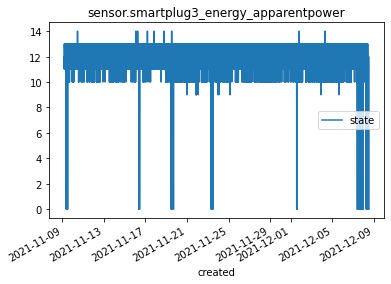

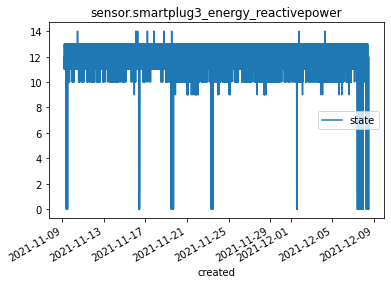

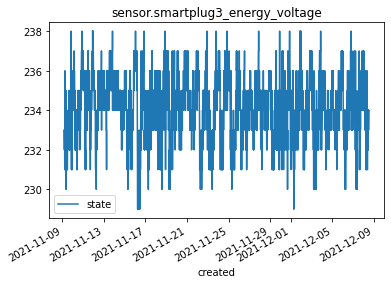

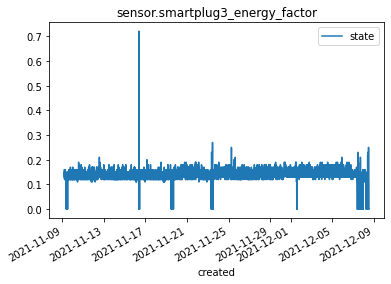

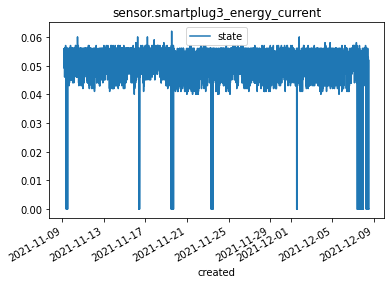

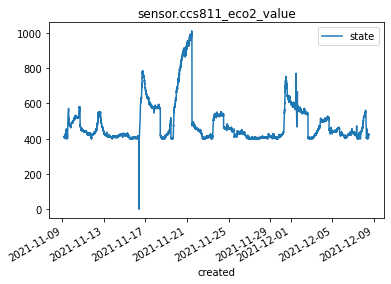

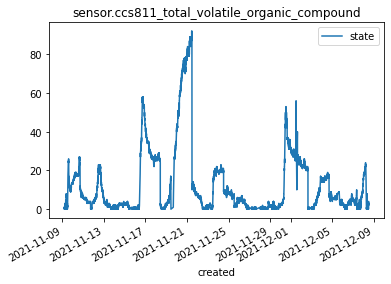

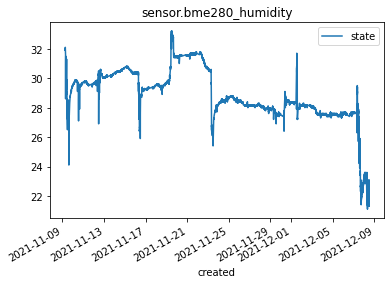

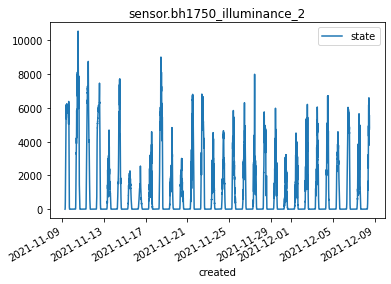

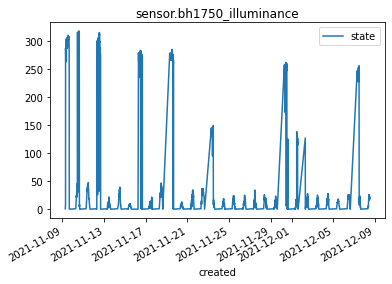

In [21]:
for i in df_dict:
    print(i)
    df_dict[i].plot(x="created", y="state", title=i)
    

<AxesSubplot:xlabel='created'>

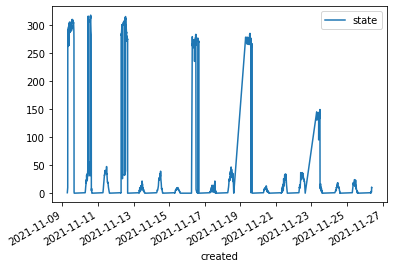

In [ ]:
df_sensor_illuminance.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

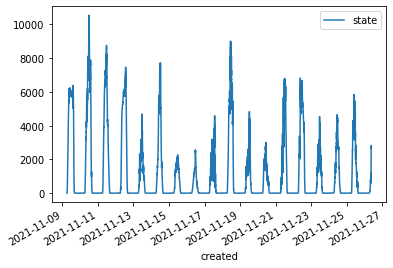

In [ ]:
df_sensor_illuminance2.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

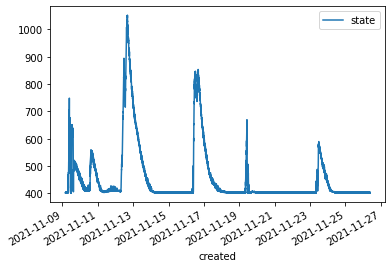

In [ ]:
df_sensor_mh_z19_co2_value.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

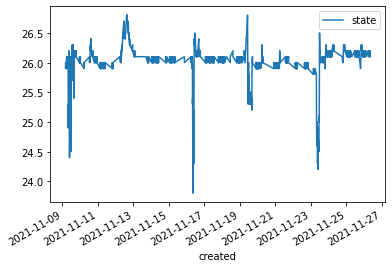

In [ ]:
df_sensor_bme280_temperature.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

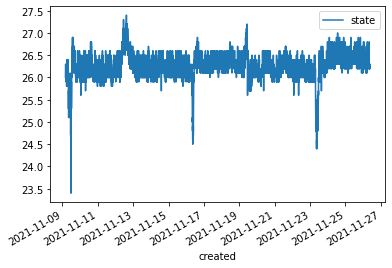

In [ ]:
df_sensor_dht22_temperature.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

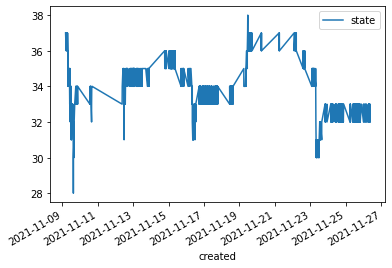

In [ ]:
df_sensor_dht22_humidity.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

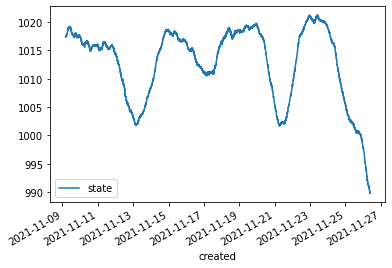

In [ ]:
df_sensor_bme280_pressure.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

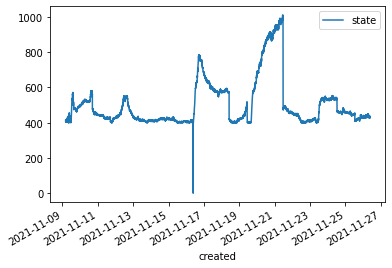

In [ ]:
df_sensor_ccs811_eco2_value.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

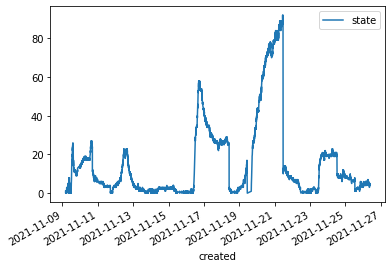

In [ ]:
df_sensor_ccs811_total_volatile_organic_compound.plot(x="created", y="state")

In [ ]:
df_sensor_ccs811_total_volatile_organic_compound[["created", "state"]]

,created,state
57,2021-11-09 04:18:48.753054,1
88,2021-11-09 04:21:48.756623,0
176,2021-11-09 04:31:48.766018,1
184,2021-11-09 04:32:48.754232,0
203,2021-11-09 04:35:48.747242,1
...,...,...
276201,2021-11-26 09:15:14.092265,4
276220,2021-11-26 09:16:14.042846,5
276230,2021-11-26 09:17:14.052541,4
276252,2021-11-26 09:18:14.058819,5


<AxesSubplot:xlabel='created'>

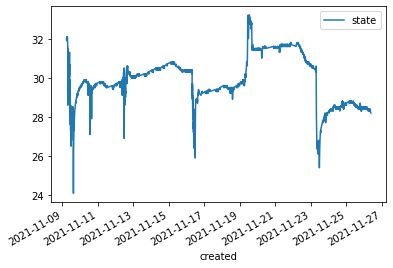

In [ ]:
df_sensor_bme280_humidity.plot(x="created", y="state")

<AxesSubplot:xlabel='created'>

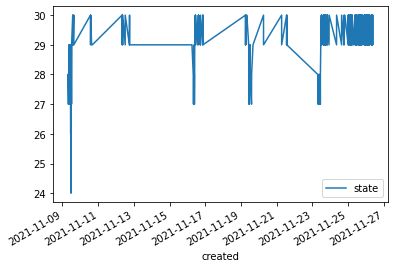

In [ ]:
df_sensor_mh_z19_temperature.plot(x="created", y="state")

In [ ]:
conn.close()